In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import sys

PROJECT_PATH = os.path.join("..")
sys.path.append(PROJECT_PATH)
from models.classifiers.deepHits_nans_norm_crop_stamp_model import (
    DeepHiTSNanNormCropStampModel,
)
from models.visualizers.deepHits_lrp_visualizer import DeepHiTSLRPVisualizer
from modules.data_set_generic import Dataset
from parameters import param_keys, general_keys

/home/rcarrasco/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rcarrasco/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rcarrasco/anaconda3/envs/tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rcarrasco/anaconda3/envs/tf/lib/python3.6/s

In [2]:
# instance model and load weights

data_path = os.path.join("../../pickles", "stamp_clf_training_set_Sep-13-2019.pkl")
# data_path = "../../pickles/converted_data.pkl"

n_classes = 5
params = {
    param_keys.RESULTS_FOLDER_NAME: "crop_at_center",
    param_keys.DATA_PATH_TRAIN: data_path,
    param_keys.WAIT_FIRST_EPOCH: False,
    param_keys.N_INPUT_CHANNELS: 3,
    param_keys.CHANNELS_TO_USE: [0, 1, 2],
    param_keys.TRAIN_ITERATIONS_HORIZON: 10000,
    param_keys.TRAIN_HORIZON_INCREMENT: 10000,
    param_keys.TEST_SIZE: n_classes * 50,
    param_keys.VAL_SIZE: n_classes * 50,
    param_keys.NANS_TO: 0,
    param_keys.NUMBER_OF_CLASSES: n_classes,
    param_keys.CROP_SIZE: 21,
    param_keys.INPUT_IMAGE_SIZE: 21,
}

model = DeepHiTSNanNormCropStampModel(params)
checkpoint_path = os.path.join(
    PROJECT_PATH, "results/best_model_so_far/checkpoints", "model"
)
model.load_model(checkpoint_path)

lrp_visualizer = DeepHiTSLRPVisualizer(model)


Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_initializable_iterator(dataset)`.

Instructions for updating:
Use `tf.compat.v1.data.get_output_types(dataset)`.
Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.

Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use keras.layers.MaxPooling2D instead.


Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Use `tf.cast` instead.








Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ../results/best_model_so_far/checkpoints/model
Forward Pass ... 
------------------------------------------------- 
input:: [None, 27, 27, 3]
conv2d_1:: [None, 24, 24, 32]
conv2d_2:: [None, 24, 24, 32]

maxpool_3:: [None, 12, 12, 32]
conv2d_4:: [None, 12, 12, 64]
conv2d_5:: [None, 12, 12, 64]
conv2d_6:: [None, 12, 12, 64]
maxpool_7:: [None, 6, 6, 64]
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
linear_8:: [None, 64]
linear_9:: [None, 64]

avgpool_10:: [None, 64]
linear_11:: [None, 5]
softmax:: [None, 5]

------------------------------------------------- 
Computing LRP ... 
------------------------------------------------- 
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
linear_11:: [None, 64]
Instructions for updating:
ksizes is deprecated, 

In [3]:
# load data
train_set, val_set, test_set = model._data_init()
# evaluate set
model.evaluate(test_set.data_array, test_set.data_label)

  0%|          | 38/33092 [00:00<01:27, 378.17it/s]

{'AGN': 0, 'SN': 1, 'VS': 2, 'asteroid': 3, 'bogus': 4}


100%|██████████| 33092/33092 [01:09<00:00, 477.59it/s]


Label count AGN: 9996 -SN: 1079 -VS: 9938 -asteroid: 9899 -bogus: 2180 -
467 misshaped samples removed
Label count AGN: 9844 -SN: 1067 -VS: 9766 -asteroid: 9797 -bogus: 2151 -
3717 samples with NaNs. NaNs replaced with number 0

Test Metrics: loss 0.717709, accuracy 0.896000


{'accuracy': 0.896, 'loss': 0.7177089}

In [5]:
def get_classification_indexes(model: DeepHiTSNanNormCropStampModel, dataset: Dataset):
    predictions = model.predict(dataset.data_array)
    correct_idxs = np.where(predictions == dataset.data_label)[0]
    incorrect_idxs = np.where(predictions != dataset.data_label)[0]
    return correct_idxs, incorrect_idxs


test_correct_idxs, test_incorrect_idxs = get_classification_indexes(model, test_set)

INCORRECT TEST


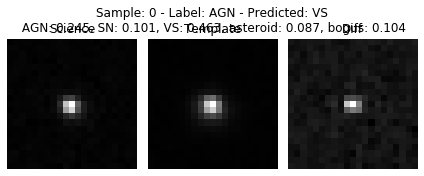

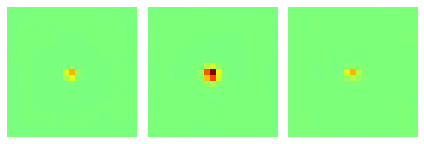

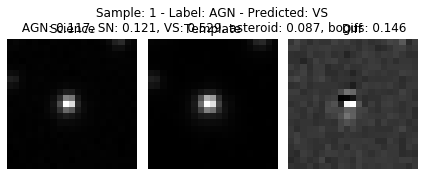

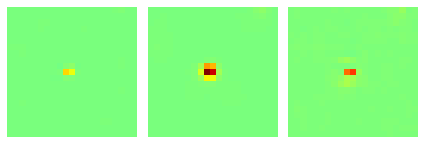

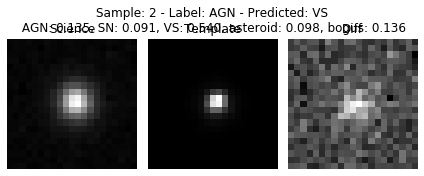

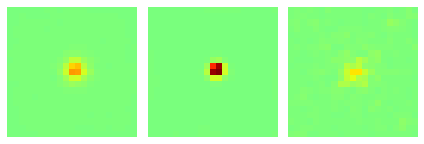

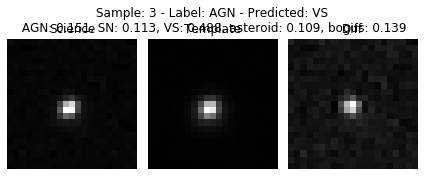

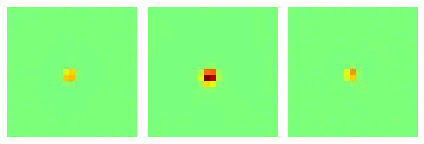

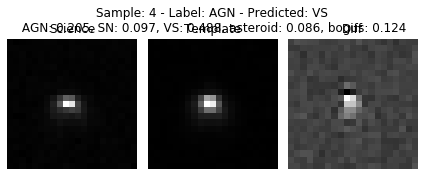

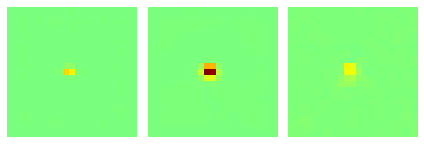

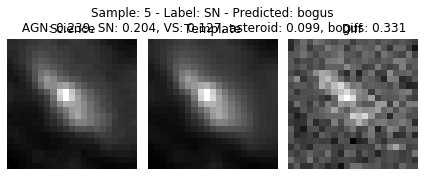

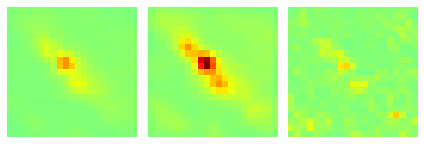

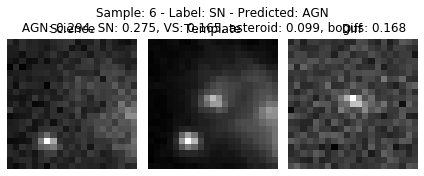

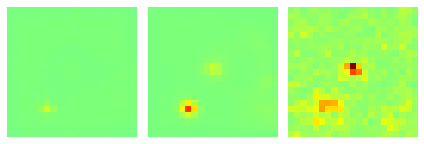

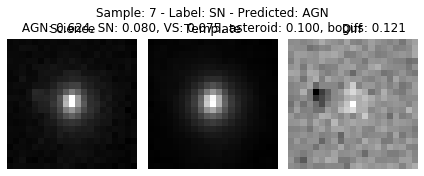

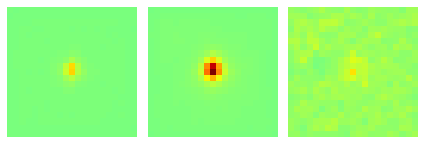

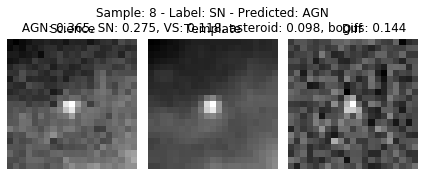

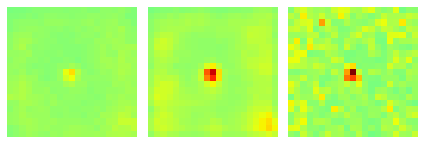

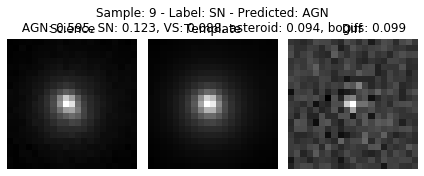

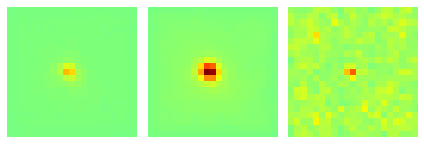

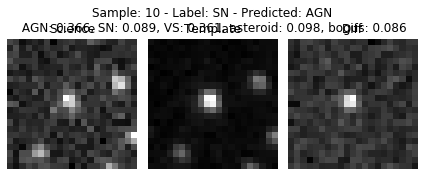

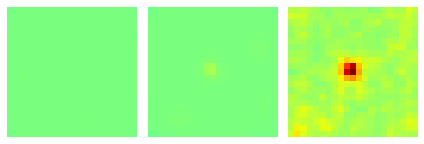

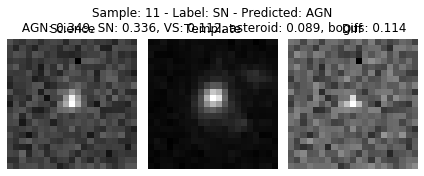

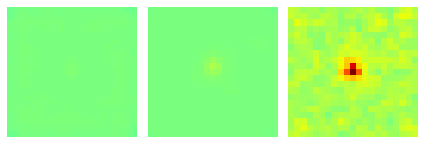

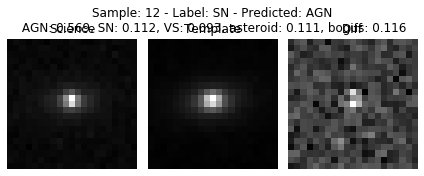

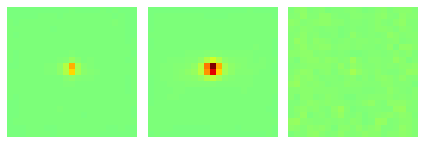

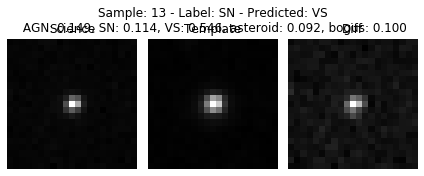

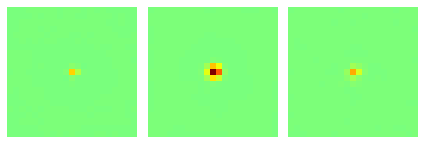

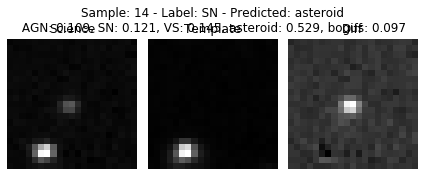

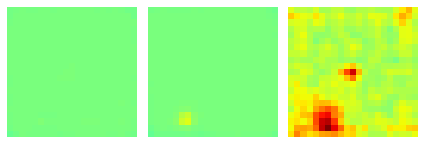

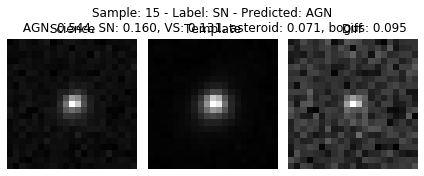

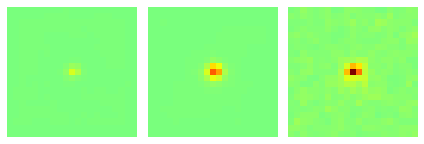

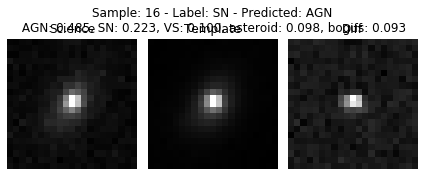

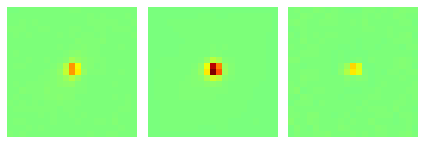

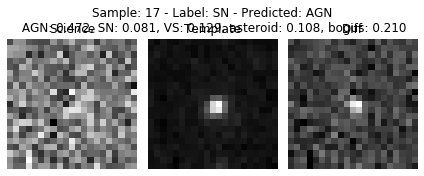

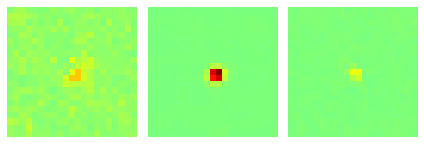

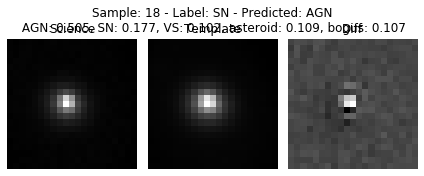

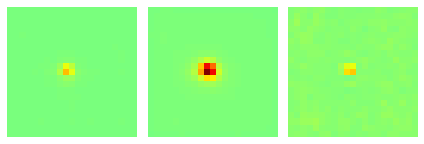

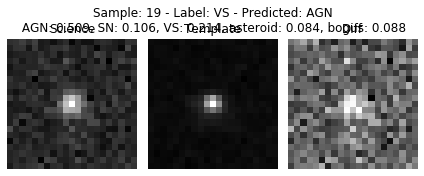

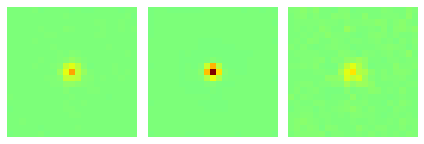

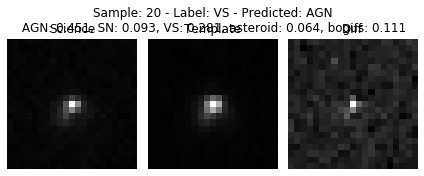

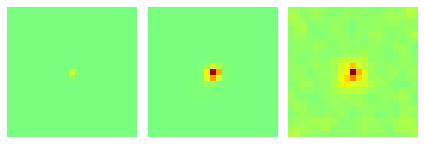

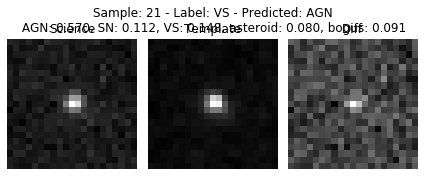

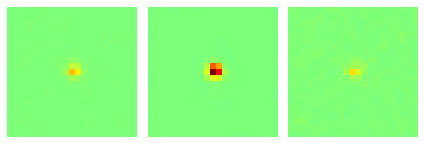

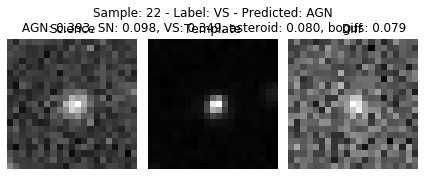

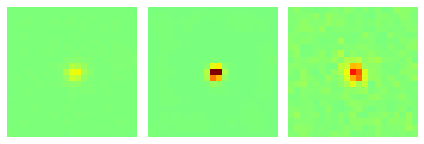

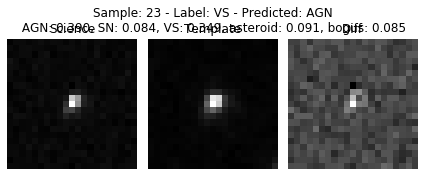

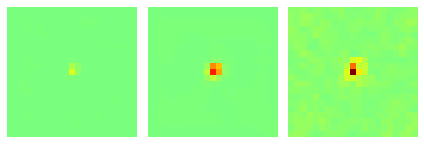

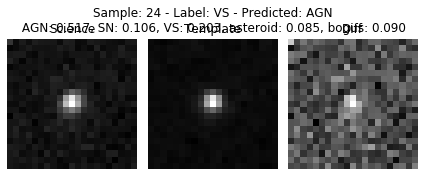

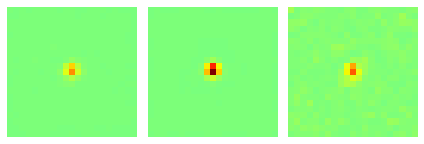

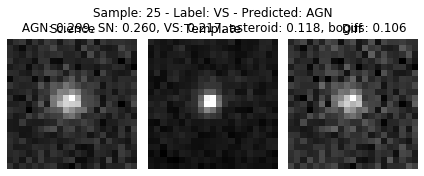

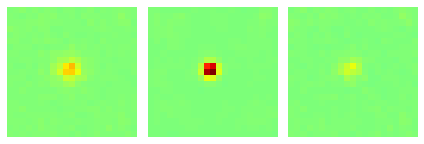

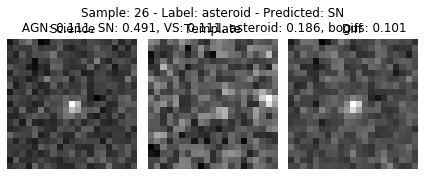

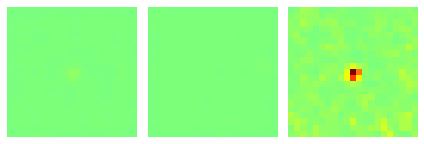

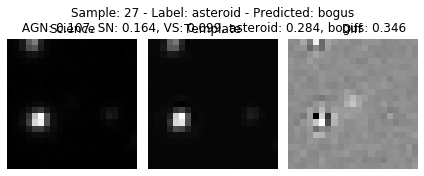

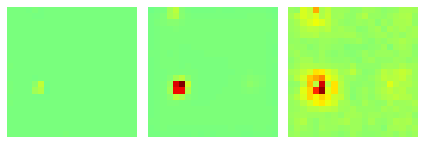

In [5]:
# INCORRECT TEST
print("INCORRECT TEST")
lrp_visualizer.plot_relevances(
    test_set.data_array[test_incorrect_idxs], test_set.data_label[test_incorrect_idxs]
)

In [6]:
# CORRECT TEST
# print('CORRECT TEST')
# lrp_visualizer.plot_relevances(test_set.data_array[test_correct_idxs],
#                                test_set.data_label[test_correct_idxs])

In [6]:
train_correct_idxs, train_incorrect_idxs = get_classification_indexes(model, train_set)

model.evaluate(train_set.data_array, train_set.data_label, set="Train")


Train Metrics: loss 0.695595, accuracy 0.929300


{'accuracy': 0.9293002, 'loss': 0.6955948}

INCORRECT TRAIN
25 / 2389 samples shown


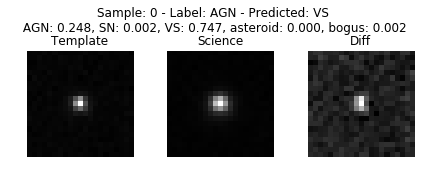

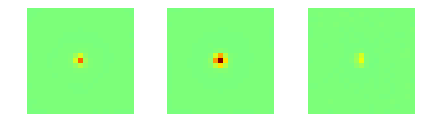

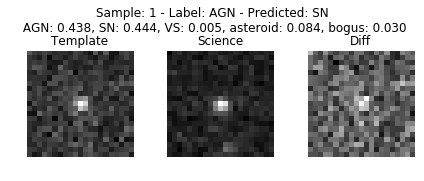

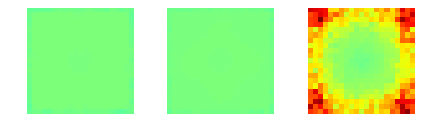

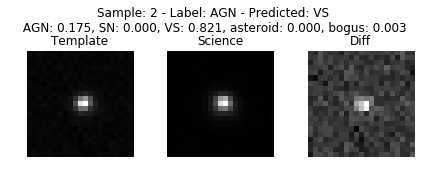

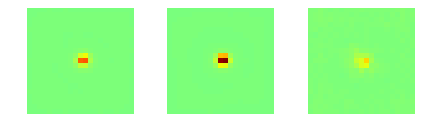

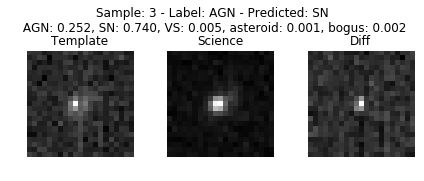

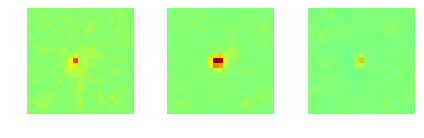

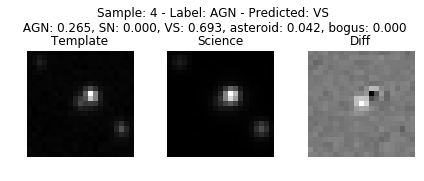

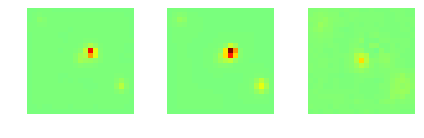

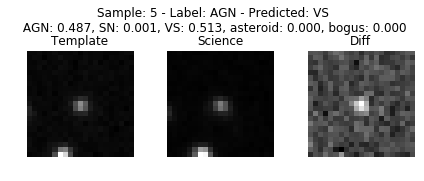

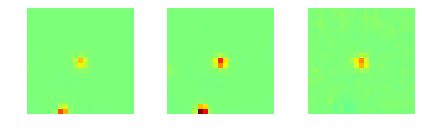

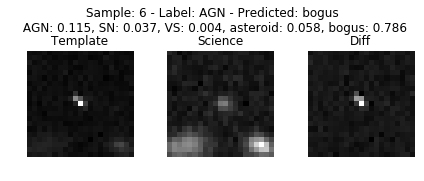

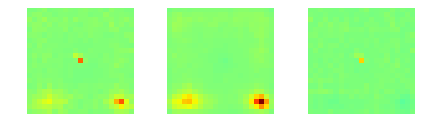

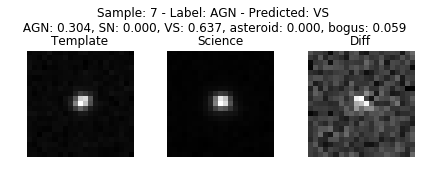

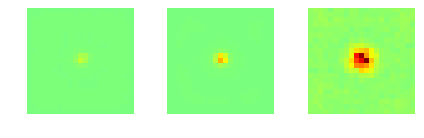

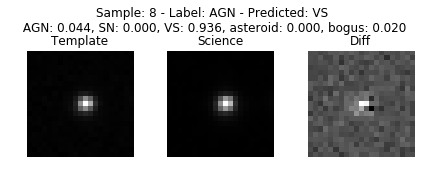

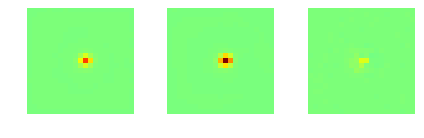

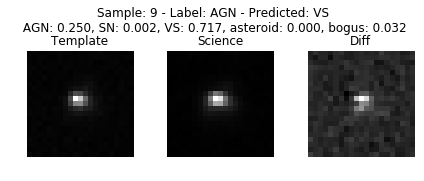

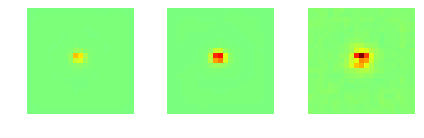

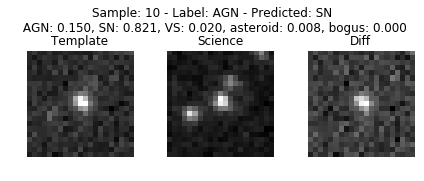

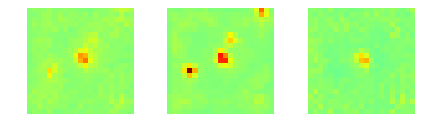

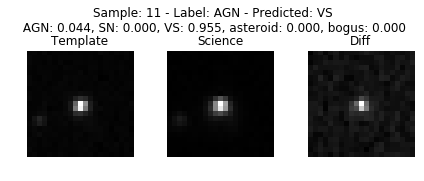

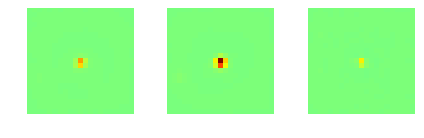

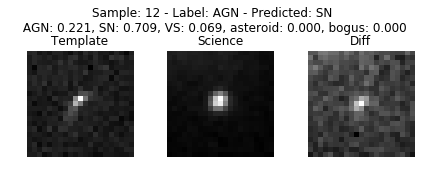

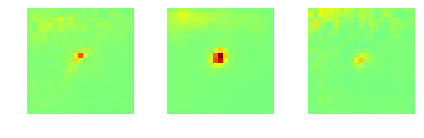

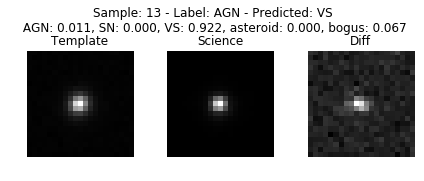

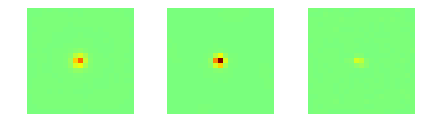

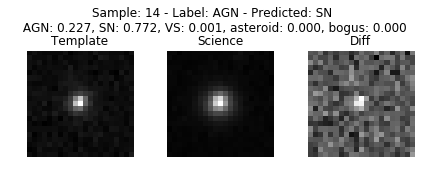

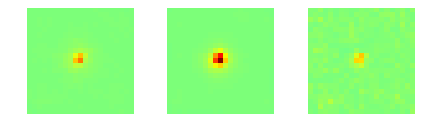

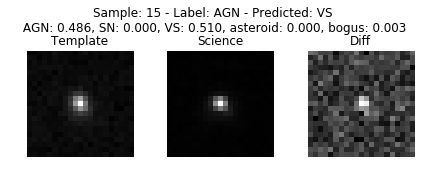

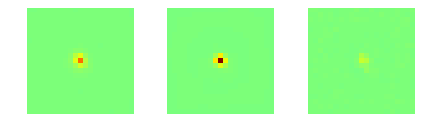

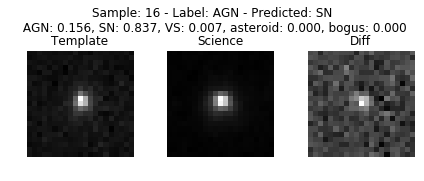

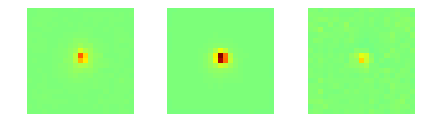

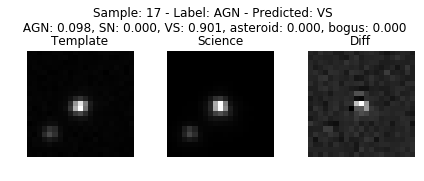

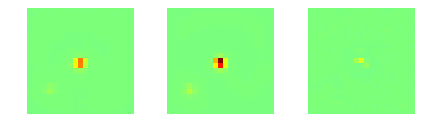

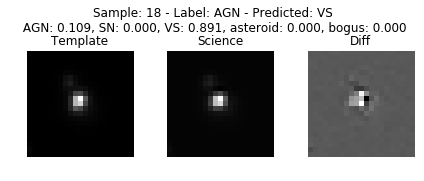

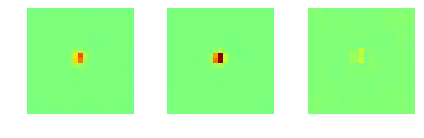

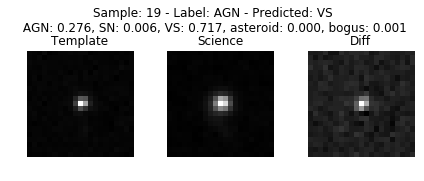

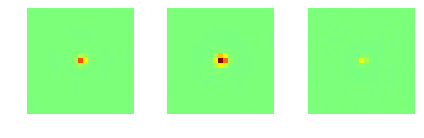

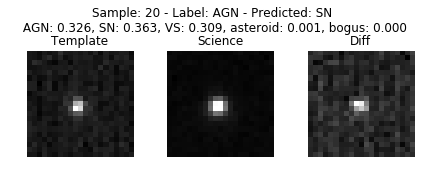

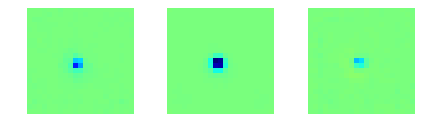

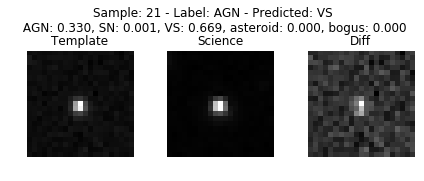

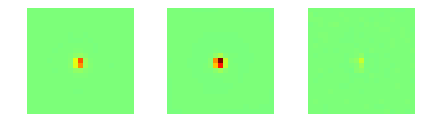

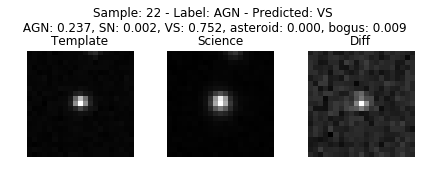

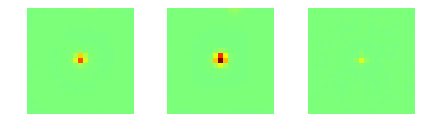

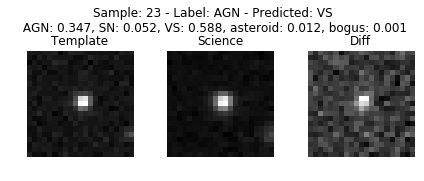

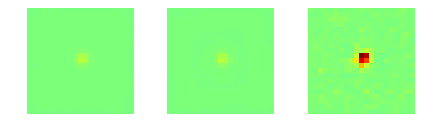

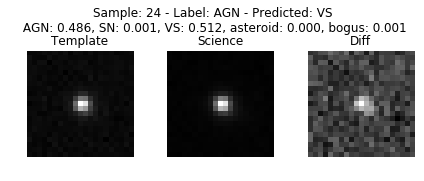

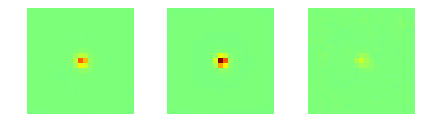

In [11]:
# INCORRECT TRAIN
print("INCORRECT TRAIN")
n_samples = 25
print("%i / %i samples shown" % (n_samples, train_incorrect_idxs.shape[0]))
lrp_visualizer.plot_relevances(
    train_set.data_array[train_incorrect_idxs][:n_samples],
    train_set.data_label[train_incorrect_idxs][:n_samples],
)